<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [90]:
wine=pd.read_csv("winequality-white.csv")

#### Load the first dataset and check the first two observations

In [91]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [92]:
# load your data
# type your code here
type(wine)

pandas.core.frame.DataFrame

In [93]:
# check data types of variables
# type your code here
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

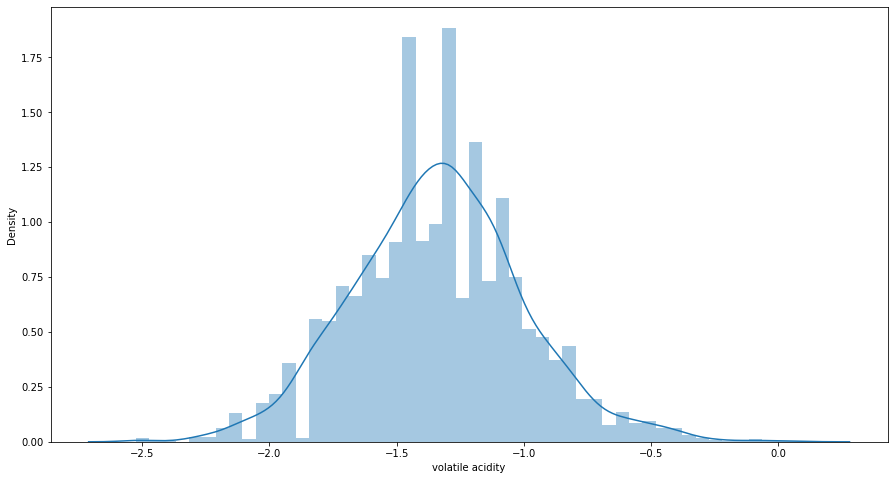

In [94]:
# type your code here
sns.distplot(np.log(wine["volatile acidity"]))

# Rec: use log to transform the variable...

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

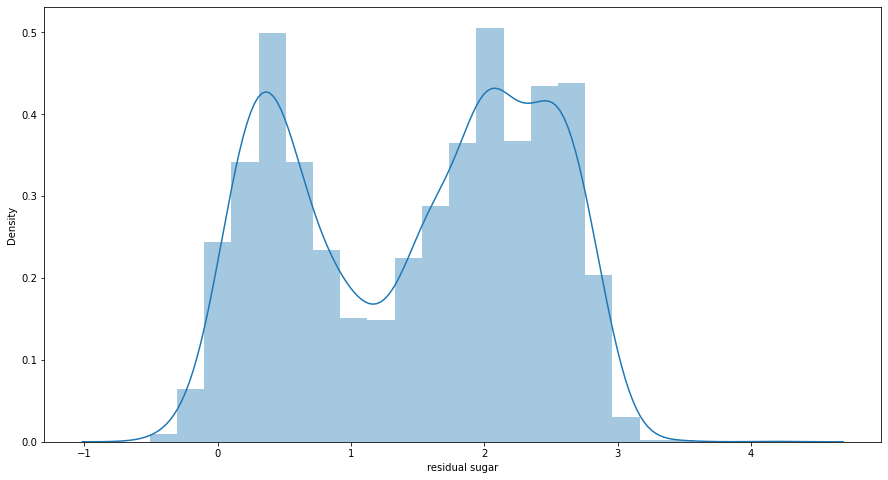

In [95]:
# type your code here
sns.distplot(np.log(wine["residual sugar"]))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# type your code here
wine.var()[wine.var()<1]

# Chlorides and Density...remove these variables.

fixed acidity       0.712114
volatile acidity    0.010160
citric acid         0.014646
chlorides           0.000477
density             0.000009
pH                  0.022801
sulphates           0.013025
quality             0.784356
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

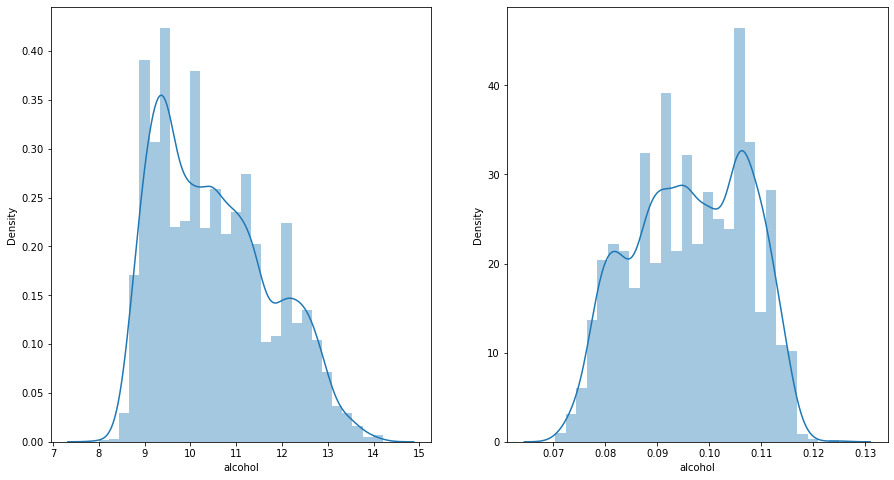

In [97]:
# type your code here
fig , axes = plt.subplots(1,2)
sns.distplot(wine['alcohol'],ax=axes[0])
sns.distplot(np.reciprocal(wine['alcohol']), ax=axes[1])
plt.show()


In [98]:
wine.alcohol.describe(), np.log(wine.alcohol).describe()

(count    4898.000000
 mean       10.514267
 std         1.230621
 min         8.000000
 25%         9.500000
 50%        10.400000
 75%        11.400000
 max        14.200000
 Name: alcohol, dtype: float64,
 count    4898.000000
 mean        2.346046
 std         0.115032
 min         2.079442
 25%         2.251292
 50%         2.341806
 75%         2.433613
 max         2.653242
 Name: alcohol, dtype: float64)

In [99]:
print(wine.alcohol.skew())
print((1/(wine.alcohol)).describe())

# Reciprocal should work...

0.4873419932065978
count    4898.000000
mean        0.096374
std         0.010885
min         0.070423
25%         0.087719
50%         0.096154
75%         0.105263
max         0.125000
Name: alcohol, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='pH', ylabel='Density'>

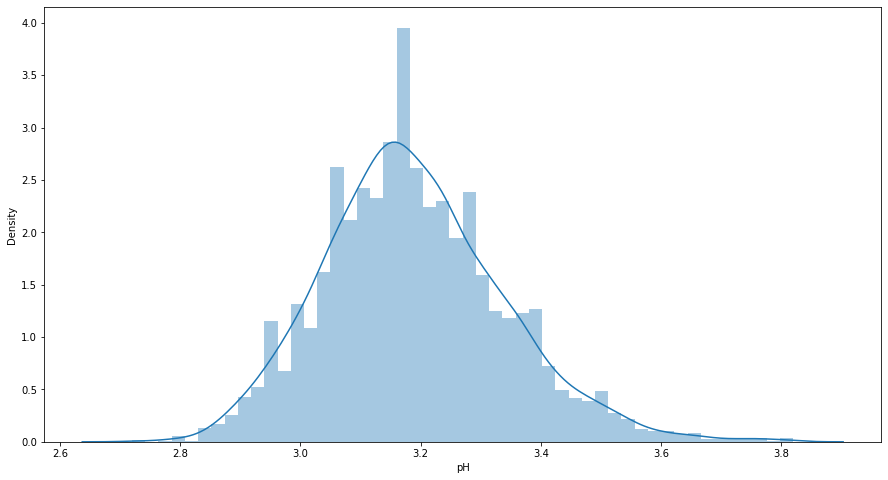

In [100]:
# type your code here
sns.distplot(wine["pH"])

In [101]:
# Without Scaling the pH Feature
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

df = wine.drop("quality", axis =1)
y = wine.quality

pred = lr.fit(df,y).predict(df)
print("R Squared: ", r2_score(y, pred))

R Squared:  0.2818703641342928


In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

wine["pH_scaled"] = sc.fit_transform(pd.DataFrame(wine["pH"]))

In [103]:
lr = LinearRegression()

df = wine.drop(["pH","quality"], axis =1)
y = wine.quality

pred = lr.fit(df,y).predict(df)
print("R Squared: ", r2_score(y, pred))

R Squared:  0.2818703641342927


pH Scaling does not have any impact on the predictive model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [104]:
# VIF Lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

# If you have to pull out only num cols
# wine.select_dtypes(include = "object").columns # no cat data

# Drop ph_scaled and quality
numcols = wine.drop(["quality", "pH_scaled"], axis = 1)

mylist =[]

for i in range(numcols.shape[1]):
    mylist.append(variance_inflation_factor(numcols.values, i))

pd.DataFrame({"Features": numcols.columns, 
              "VIF": mylist}).sort_values(ascending=False, by ="VIF")

,Features,VIF
7,density,1056.497431
8,pH,609.861725
10,alcohol,118.707368
0,fixed acidity,92.861483
6,total sulfur dioxide,24.980802
9,sulphates,20.527123
2,citric acid,10.007114
1,volatile acidity,9.730569
5,free sulfur dioxide,9.261556
4,chlorides,6.497448


All the variables which have VIF < 10 are good to go. We see that variables starting from Citric Acid and all the variables below that are VIF< 10 which are the favoured variables as they have very small element of Multicollinearity.

Note: Alcohol and pH though are highly collinear for Linear Regression, they have a very high weightage in making the wine as a product. We need to recheck if that variable needs to be removed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
# type your code here

# Without Scaling the pH Feature
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

df = wine.drop(['pH', "quality"], axis =1)
y = wine.quality

pred = lr.fit(df,y).predict(df)
print("R Squared: ", r2_score(y, pred))

R Squared:  0.2818703641342927


In [106]:
# Finding the Residual
residual = wine.quality - pred

#from scipy.stats import probplot
#probplot(residual, plot = plt)
#plt.show()

stats.shapiro(residual) # Normality Assumption is violated

ShapiroResult(statistic=0.9893670082092285, pvalue=9.396133795554963e-19)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
# type your code here
wine["citric acid"].describe() # Log Transformation cannot work as Log(0) is undefined

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

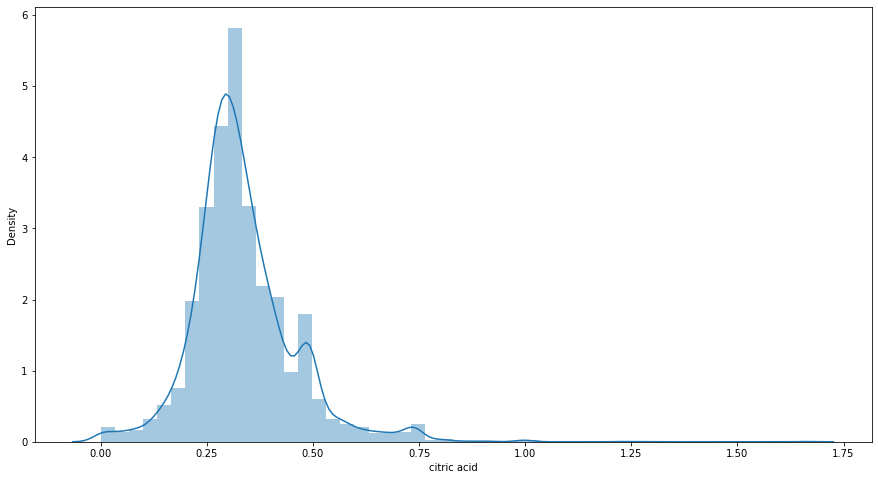

In [108]:
# Sqroot Transformation
sns.distplot(wine["citric acid"])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

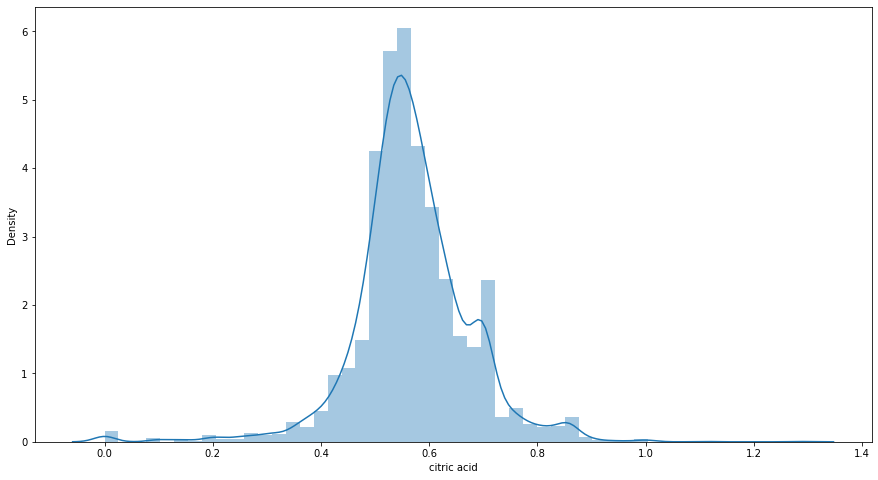

In [109]:
# Sqrt Transformation
sns.distplot(np.sqrt(wine["citric acid"]))

In [110]:
df = wine.drop(['pH',"quality"], axis =1)
df = sma.add_constant(df)

model = sma.OLS(y, df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:01:39   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811 

In [111]:
# Build a Model using Sqrt(Citric Acid)

wine["sqrt_citric"] = np.sqrt(wine["citric acid"])
wine.columns

newdf = wine.drop(["citric acid", "quality"], axis = 1)
# y = wine.quality

pred_new = lr.fit(newdf, y).predict(newdf)
print("R2: ", r2_score(y, pred_new))

R2:  0.282172089416469


In [112]:
import statsmodels.api as sma
newdf = sma.add_constant(newdf)

model = sma.OLS(y, newdf).fit()
print(model.summary())

# Inf: Slight Improvement in Adj R2 after scaling the citric acid.

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     174.6
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:01:39   Log-Likelihood:                -5542.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.0537 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
# type your code here

df = wine.drop(['pH',"sqrt_citric","quality"], axis =1)
df = sma.add_constant(df)

model = sma.OLS(y, df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:01:39   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811 

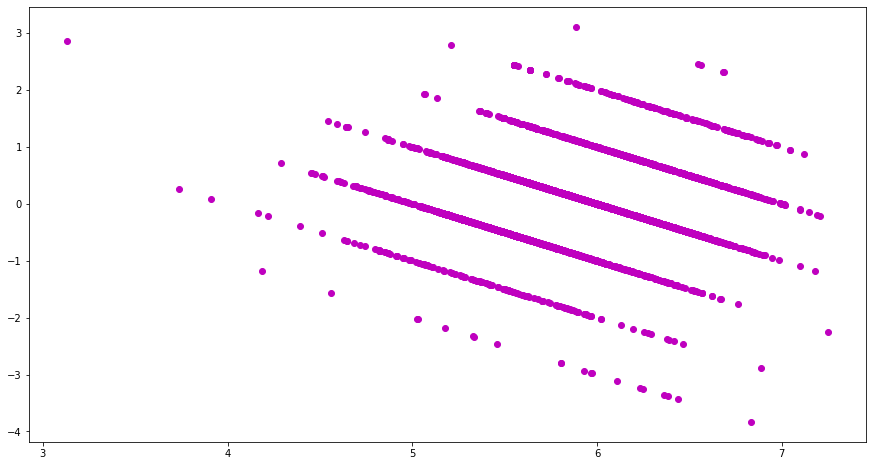

In [114]:
plt.scatter(model.fittedvalues, model.resid, color = "m") # Linearity assumption is violated.

# Same can be verified by Rainbow test

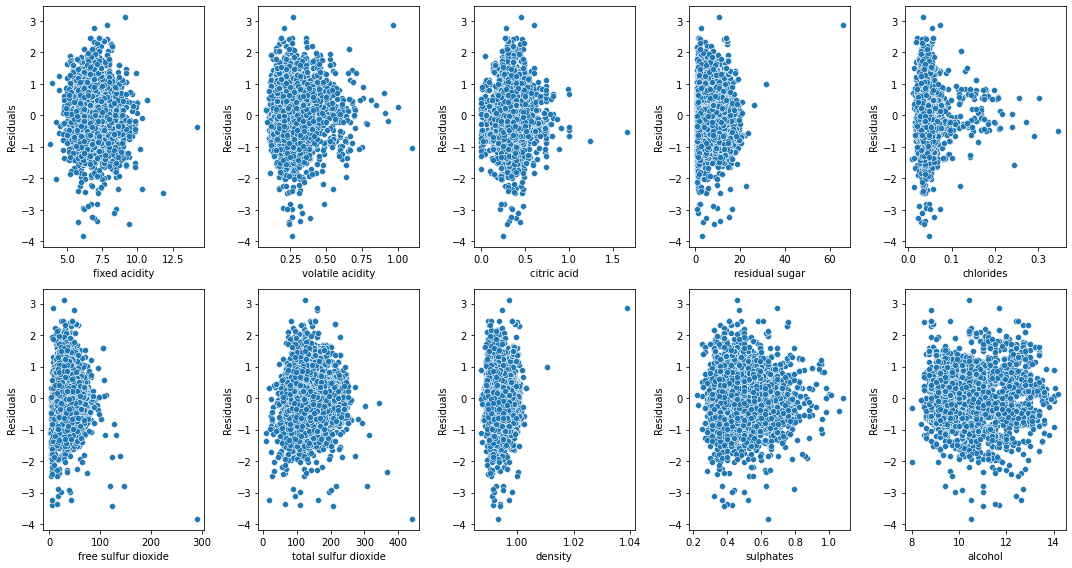

In [115]:
# Check each and every column vs Residual...

# Subplots
fig, ax = plt.subplots(nrows=2, ncols = 5, figsize = (15, 8))

# Use the loop and build a scatterplot between each column vs Residuals...

for variable, plotsubs in zip(df.columns[1:], ax.flatten()):
    plotters = sns.scatterplot(df[variable], model.resid, ax = plotsubs)
    plotters.set_ylabel("Residuals")

    
plt.tight_layout()
plt.show()

In [116]:
#zip(df.columns[1:])
df.columns[1:
          ]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'pH_scaled'],
      dtype='object')

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# type your code here - Forward as True & Find Top 5 Features
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
finaldf = df.drop("const", axis = 1)
finaldf.columns
sfs = SFS(estimator = lr, forward = True, scoring = "r2", cv = 5, verbose = 2, k_features = 5)

sfsmodel = sfs.fit(finaldf, y)
print("Features: ", sfsmodel.k_feature_names_)
#print("R Squared: ", sfsmodel.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-01-20 14:01:43] Features: 1/5 -- score: 0.1712425239202338[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-01-20 14:01:44] Features: 2/5 -- score: 0.22414892843723075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-01-20 14:01:44] Features: 3/5 -- score: 0.2391357192185853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Features:  ('volatile acidity', 'residual sugar', 'density', 'alcohol', 'pH_scaled')



[2021-01-20 14:01:44] Features: 5/5 -- score: 0.24492882616553402

In [118]:
from sklearn.feature_selection import RFE

lrfit = LinearRegression()
rfe = RFE(estimator=lrfit, n_features_to_select=5)

rfemodel = rfe.fit_transform(finaldf, y)
colnos = rfe.get_support(indices = True)

print(finaldf.iloc[:, colnos].columns)

Index(['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol'], dtype='object')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
# type your code here - Forward as False & Find Top 5 Features

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(estimator = lr, forward = False, 
          scoring = "r2", cv = 5, verbose = 2, k_features = 5)

sfsmodel = sfs.fit(finaldf, y)
print("Features: ", sfsmodel.k_feature_names_)
print("R Squared: ", sfsmodel.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2021-01-20 14:01:45] Features: 10/5 -- score: 0.24661322311301426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-01-20 14:01:45] Features: 9/5 -- score: 0.24680410075623055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-01-20 14:01:45] Features: 8/5 -- score: 0.24692329016012052[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

Features:  ('volatile acidity', 'residual sugar', 'density', 'alcohol', 'pH_scaled')
R Squared:  0.24492882616553402


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2021-01-20 14:01:46] Features: 6/5 -- score: 0.24672544391479628[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-01-20 14:01:46] Features: 5/5 -- score: 0.24492882616553402

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
# type your code here - Forward as True & Find (2,6)

sfs = SFS(estimator = lr, forward = True, 
          scoring = "r2", cv = 5, verbose = 2, k_features = (2, 6))

sfsmodel = sfs.fit(finaldf, y)
print("Features: ", sfsmodel.k_feature_names_)
print("R Squared: ", sfsmodel.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-01-20 14:01:46] Features: 1/6 -- score: 0.1712425239202338[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-01-20 14:01:46] Features: 2/6 -- score: 0.22414892843723075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-01-20 14:01:47] Features: 3/6 -- score: 0.2391357192185853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Features:  ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'alcohol', 'pH_scaled')
R Squared:  0.24672544391479628


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2021-01-20 14:01:47] Features: 6/6 -- score: 0.24672544391479628

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [121]:
# type your code here

sfs = SFS(estimator = lr, forward = True, 
          scoring = "r2", cv = 5, verbose = 2, k_features = "best")

sfsmodel = sfs.fit(finaldf, y)
print("Features: ", sfsmodel.k_feature_names_)
print("R Squared: ", sfsmodel.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-01-20 14:01:47] Features: 1/11 -- score: 0.1712425239202338[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-01-20 14:01:48] Features: 2/11 -- score: 0.22414892843723075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-01-20 14:01:48] Features: 3/11 -- score: 0.2391357192185853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

Features:  ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol', 'pH_scaled')
R Squared:  0.24706598334198074



[2021-01-20 14:01:49] Features: 9/11 -- score: 0.24680410075623055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-01-20 14:01:49] Features: 10/11 -- score: 0.24661322311301426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-01-20 14:01:49] Features: 11/11 -- score: 0.24577850483203764

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [122]:
# type your code here
sfs = SFS(estimator = lr, forward = False, 
          scoring = "r2", cv = 5, verbose = 2, k_features = "best")

sfsmodel = sfs.fit(finaldf, y)
print("Features: ", sfsmodel.k_feature_names_)
print("R Squared: ", sfsmodel.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-01-20 14:01:49] Features: 10/1 -- score: 0.24661322311301426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-01-20 14:01:49] Features: 9/1 -- score: 0.24680410075623055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2021-01-20 14:01:50] Features: 8/1 -- score: 0.24692329016012052[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

Features:  ('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol', 'pH_scaled')
R Squared:  0.24706598334198074



[2021-01-20 14:01:51] Features: 3/1 -- score: 0.2391357192185853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-01-20 14:01:51] Features: 2/1 -- score: 0.22414892843723083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-01-20 14:01:51] Features: 1/1 -- score: 0.1712425239202338

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [123]:
# type your code here

cols = ['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol']

x = wine.loc[:, cols]
x = sma.add_constant(x)

model = sma.OLS(y, x).fit()
print(model.summary()) # Adj R2: 0.249

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     326.0
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          3.90e-302
Time:                        14:01:51   Log-Likelihood:                -5650.4
No. Observations:                4898   AIC:                         1.131e+04
Df Residuals:                    4892   BIC:                         1.135e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -33.4308      6.030  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
# type your code here

newvars = wine.loc[:, ['volatile acidity', 'residual sugar', 
                       'density', 'pH', 'alcohol']]

newvars = sma.add_constant(newvars)

model = sma.OLS(y, newvars).fit()

#model.summary()

print("RMSE for Whole Data: ",np.sqrt(mean_squared_error(y, model.predict(newvars))))

RMSE for Whole Data:  0.7560563003274657


In [125]:
newfeat = newvars.drop("const", axis = 1)

# Splitting the data in Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(newfeat, y, 
                                                test_size = 0.20, random_state = 1)
# Defining the Model
lrmodel = LinearRegression()

# Making the Prediction
pred_train = lrmodel.fit(xtrain, ytrain).predict(xtrain) # prediction on Train
pred_test = lrmodel.fit(xtrain, ytrain).predict(xtest) # prediction on Test

# RMSE on Train and Test
print("RMSE for Train: ",np.sqrt(mean_squared_error(ytrain, pred_train)))
print("RMSE for Test: ",np.sqrt(mean_squared_error(ytest, pred_test)))

# Whether the Model is Overfitting?

#lrmodel.predict(unknownset) # ytest value is not there...

# If the error in test<error in training, model is really doing well. 
# Note: The errors should be close.
# If the Test Error > Train Error => Bad performance. 
# It means that whatever machine learnt using training data is not good and therefore,
# there are errors. It simply signifies Underfitting of the Model.

# Conc: Model is not Overfitting

RMSE for Train:  0.7586908195704426
RMSE for Test:  0.7457667085404095


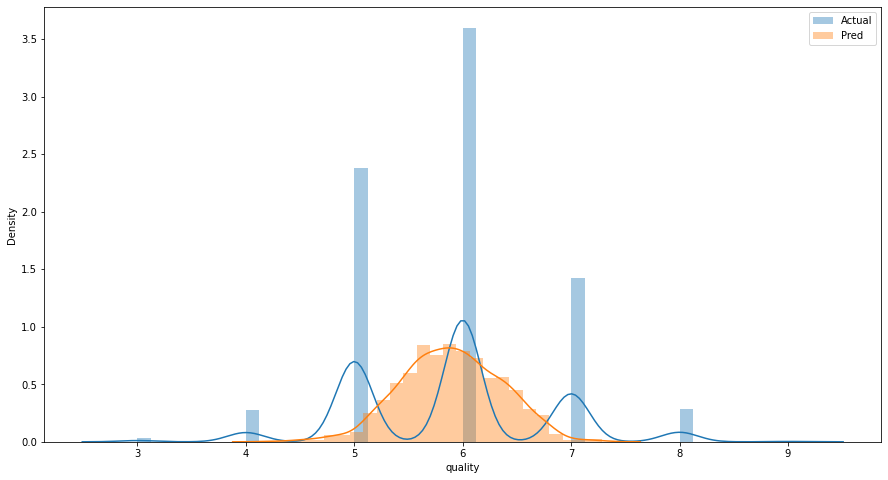

In [126]:
sns.distplot(ytrain, label = "Actual")
sns.distplot(pred_test, label = "Pred")
plt.legend()
plt.show()

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
# type your code here # 3.0 to 3.4

# Between 3-3.4 - Neutral
# < 3 Acidic
# > 3.4 - Basic

wine["pH"].describe() 

def bin_ph(x):
    if(x<3):
        return("Acidic")
    elif(x>3.4):
        return("Basic")
    else:
        return("Neutral")

wine["ph_binned"] = wine["pH"].apply(bin_ph)

In [128]:
X.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH_scaled
0,7.0,0.27,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,-1.246921
1,6.3,0.30,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0.740029
2,8.1,0.28,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0.475102
3,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0.011480
4,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0.011480


In [129]:
# Dropping the Columns
X = wine.drop(["quality", "pH", "citric acid"], axis = 1)

# One Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Adding a Constant
newX = sma.add_constant(X)

# Building a Model
phmodel = sma.OLS(y, newX).fit()

# Summary
phmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:01:52   Log-Likelihood:                -5539.5
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4884   BIC:                         1.120e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  156.2600     19.017      8.217      0.000     118.977     193.543
fixed acidity            0.0620      0.021      2.962      0.003       0.021       0.103
volatile acidity        -1.8044      0.116    -15.571      0.000      -2.032      -1.577
residual sugar           0.0825      0.008     10.960      0.000       0.068       0.097
chlorides               -0.3253      0.546     -0.595      0.552      -1.396       0.746
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.690      0.490      -0.001       0.000
density               -154.1113     19.079     -8.078      0.000    -191.515    -116.708
sulphates                0.6275      0.100      6.253      0.000       0.431       0.824
alcohol                  0.1877      0.024      7.735      0.000       0.140       0.235
pH_scaled                0.1188      0.021      5.749      0.000       0.078       0.159
sqrt_citric              0.1649      0.110      1.500      0.134      -0.051       0.381
ph_binned_Basic         -0.0904      0.081     -1.112      0.266      -0.250       0.069
ph_binned_Neutral       -0.1067      0.047     -2.275      0.023      -0.199      -0.015
==============================================================================
Omnibus:                      115.485   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.556
Skew:                           0.063   Prob(JB):                     7.17e-57
Kurtosis:                       4.118   Cond. No.                     3.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
# type your code here

from sklearn.model_selection import cross_val_score

newlr = LinearRegression()
scores = cross_val_score(estimator=newlr, X = X, y = y, cv = 20, scoring = "r2")

# CV = 20 is doing good...

print("All Scores", scores)
print("Min Scores", np.min(scores))
print("Avg Scores", np.mean(scores))
print("Max Scores", np.max(scores))
print("SD Scores", np.std(scores))

All Scores [0.22275419 0.20049092 0.32006087 0.12619827 0.30701325 0.21733526
 0.29485266 0.37859838 0.0513628  0.26732648 0.3359978  0.27734421
 0.21672117 0.28114645 0.3875177  0.23229613 0.23363727 0.15119087
 0.13626774 0.23331742]
Min Scores 0.05136280096220547
Avg Scores 0.24357149214533882
Max Scores 0.3875176991458269
SD Scores 0.0830409188089193


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
# type your code here

scores = cross_val_score(estimator=newlr, X = X, y = y, cv = 5, scoring = "r2")

print("All Scores", scores)
print("Min Scores", np.min(scores))
print("Avg Scores", np.mean(scores))
print("Max Scores", np.max(scores))
print("SD Scores", np.std(scores))

All Scores [0.20276653 0.28907724 0.27152584 0.30196725 0.15199328]
Min Scores 0.15199328274635826
Avg Scores 0.24346602737727344
Max Scores 0.3019672512009606
SD Scores 0.05712064586692614


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
# type your code here
# X and Y Variables
from sklearn.model_selection import KFold, LeaveOneOut

#xtr,xtes, ytr, ytes = train_test_split(X, y, test_size = 0.20, random_state = 0) 

loocv_rmse = []
n = X.shape[0]
loocv = LeaveOneOut()

lrfit = LinearRegression()

def r2scores(model, x_train, y_train, x_test,y_test):
    pred_model = model.fit(x_train, y_train).predict(x_test)
    return(np.sqrt(mean_squared_error(y_test, pred_model)))
    #return(r2_score(y_test,pred_model))

scores = []
for i, j in loocv.split(X):
    #result = next(loocv.split(X))
    xtrain = X.iloc[i]
    xtest = X.iloc[j]
    ytrain = y.iloc[i]
    ytest = y.iloc[j]
    loocv_rmse.append(r2scores(lrfit, xtrain, ytrain, xtest, ytest))

    
# Print all the Scores
print("All Scores", np.round(loocv_rmse,4))

# Print the Min Score
print("\nMin Score", np.round(np.min(loocv_rmse), 4))

# MaxScore
print("MaxScore", np.round(np.max(loocv_rmse), 4))

# Average & SD Score
print("Avg Score", np.round(np.mean(loocv_rmse), 4))
print("SD Score", np.round(np.std(loocv_rmse), 4))

All Scores [0.4662 0.7777 0.2351 ... 0.5972 0.4188 0.3567]

Min Score 0.0
MaxScore 4.5335
Avg Score 0.5854
SD Score 0.475
